LSTM
explained_variance_score:0.958901
mape:14.349679%
mae:12.014001
mse:269.566515
rmse:16.418481
r2:0.957500
GRU
explained_variance_score:0.958950
mape:13.950521%
mae:11.907558
mse:266.873854
rmse:16.336274
r2:0.957925
SAEs
explained_variance_score:0.957694
mape:17.894128%
mae:12.653961
mse:284.628217
rmse:16.870928
r2:0.955125
BiLSTM
explained_variance_score:0.958668
mape:13.849265%
mae:11.909760
mse:262.773325
rmse:16.210285
r2:0.958571


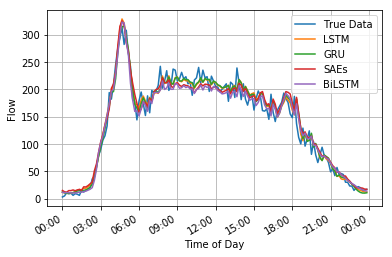

In [3]:
def test():
    lstm = load_model('model/lstm10.h5', custom_objects={'myloss': myloss})
    gru = load_model('model/gru10.h5', custom_objects={'myloss': myloss})
    saes = load_model('model/saes10.h5', custom_objects={'myloss': myloss})
    bi_lstm = load_model('model/bi_lstm_10.h5', custom_objects={'myloss': myloss})
    models = [lstm, gru, saes, bi_lstm]
    names = ['LSTM', 'GRU', 'SAEs', 'BiLSTM']

    lag = 12
    file1 = 'data/train_traffic_flow_10.csv'
    file2 = 'data/test_traffic_flow_10.csv'
    _, _, X_test, y_test, scaler = process_data(file1, file2, lag)
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).reshape(1, -1)[0]

    y_preds = []
    for name, model in zip(names, models):
        if name == 'SAEs':
            X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1]))
        else:
            X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
        file = 'images/' + name + '10.png'
        plot_model(model, to_file=file, show_shapes=True)
        predicted = model.predict(X_test)
        predicted = scaler.inverse_transform(predicted.reshape(-1, 1)).reshape(1, -1)[0]
        y_preds.append(predicted[:144])
        print(name)
        evaluation(y_test, predicted)

    plot_results(y_test[: 144], y_preds, names)

test()